In [455]:
import pandas as pd
import numpy as np

In [588]:
user_eng_df = pd.read_csv('/Users/vishnu/Documents/github_repo/datascience_playg/relax_challenge/takehome_user_engagement.csv',encoding = "ISO-8859-1")
user_df = pd.read_csv('/Users/vishnu/Documents/github_repo/datascience_playg/relax_challenge/takehome_users.csv',encoding = "ISO-8859-1", index_col='object_id')

In [589]:
user_eng_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [590]:
user_df.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN


In [591]:
user_df = user_df.dropna(axis=0,subset=['last_session_creation_time'])

In [592]:
user_engg_wip_df = user_eng_df.copy()
user_engg_wip_df['time_stamp'] = pd.to_datetime(user_engg_wip_df['time_stamp'])
user_engg_wip_df['time_stamp'] = user_engg_wip_df['time_stamp'].dt.floor('d').astype(np.int64)
#sorting and remove duplicated days per users 
user_engg_wip_df = user_engg_wip_df.sort_values(['user_id', 'time_stamp']).drop_duplicates()
roolingdata = user_engg_wip_df.groupby('user_id')['time_stamp'].rolling(window=3)
p = pd.to_timedelta(roolingdata.max() - roolingdata.min()).dt.days
adopted_users = p[p<=7]
adopted_userid_ix = adopted_users.index.get_level_values(0).unique()

In [688]:
# filter adopted user details
adopted_user_details = user_df[user_df.index.isin(adopted_userid_ix)].copy()
adopted_user_details['adopted_user'] = True

non_adopted_user_details = user_df[~user_df.index.isin(adopted_userid_ix)].copy()
non_adopted_user_details['adopted_user'] = False

In [689]:
adopted_user_details

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,,,,,,,,,,
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True
20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,True
33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,True
42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,True
43,2012-12-31 07:13:17,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0,True
50,2012-06-03 11:02:08,Oliveira Gabrielly,GabriellyAlmeidaOliveira@gmail.com,GUEST_INVITE,1.350990e+09,0,0,61,50.0,True
53,2013-02-09 23:47:15,Ribeiro Camila,CamilaGomesRibeiro@gmail.com,GUEST_INVITE,1.367798e+09,0,0,37,3641.0,True
60,2014-03-21 22:56:03,McEacharn Archie,ArchieMcEacharn@gmail.com,ORG_INVITE,1.400195e+09,0,0,88,3463.0,True


In [683]:
adopted_users_count = adopted_users.groupby(adopted_users.index.get_level_values(0)).agg('count')
adopted_users_count_series = pd.DataFrame(data = adopted_users_count)

In [684]:
adopted_user_details = pd.concat([adopted_user_details,adopted_users_count_series],axis=1)

In [691]:
adopted_user_details.reset_index()
adopted_user_details.rename(columns={'index':'object_id'}, inplace=True)

In [692]:
adopted_user_details.columns

Index(['creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted_user'],
      dtype='object')

In [702]:
adopted_user_details

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,,,,,,,,,,
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True
20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,True
33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,True
42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,True
43,2012-12-31 07:13:17,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0,True
50,2012-06-03 11:02:08,Oliveira Gabrielly,GabriellyAlmeidaOliveira@gmail.com,GUEST_INVITE,1.350990e+09,0,0,61,50.0,True
53,2013-02-09 23:47:15,Ribeiro Camila,CamilaGomesRibeiro@gmail.com,GUEST_INVITE,1.367798e+09,0,0,37,3641.0,True
60,2014-03-21 22:56:03,McEacharn Archie,ArchieMcEacharn@gmail.com,ORG_INVITE,1.400195e+09,0,0,88,3463.0,True


In [695]:
non_adopted_user_details.reset_index()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
2,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
3,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False
4,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False
5,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False
6,11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,1.388117e+09,0,0,69,NaN,False
7,13,2014-03-30 16:19:38,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,1.396196e+09,0,0,254,11204.0,False
8,14,2012-10-11 16:14:33,Rivera Bret,BretKRivera@gmail.com,SIGNUP,1.350058e+09,0,0,0,NaN,False
9,17,2014-04-09 14:39:38,Reynolds Anthony,AnthonyReynolds@jourrapide.com,GUEST_INVITE,1.397314e+09,1,0,175,1600.0,False


In [703]:
non_adopted_user_details

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False
11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,1.388117e+09,0,0,69,NaN,False
13,2014-03-30 16:19:38,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,1.396196e+09,0,0,254,11204.0,False
14,2012-10-11 16:14:33,Rivera Bret,BretKRivera@gmail.com,SIGNUP,1.350058e+09,0,0,0,NaN,False


In [731]:
user_details_cleaned = pd.concat([adopted_user_details,non_adopted_user_details])

In [733]:
user_details_cleaned.sort_index(inplace=True)

In [897]:
user_details_cleaned

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False
10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True
11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,1.388117e+09,0,0,69,NaN,False


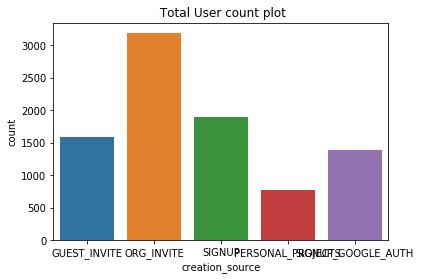

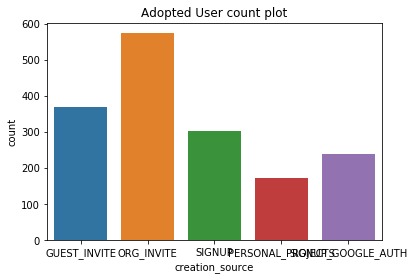

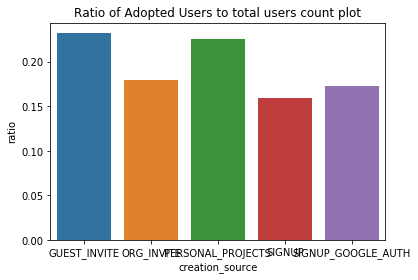

In [793]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(user_details_cleaned.creation_source, 
              order=user_details_cleaned.creation_source.unique())
plt.title(' Total User count plot')
plt.show()

sns.countplot(user_details_cleaned[user_details_cleaned.adopted_user == True].creation_source,
              order=user_details_cleaned.creation_source.unique())
plt.title('Adopted User count plot')
plt.show()

user_details_cleaned_cp = user_details_cleaned.copy()
creation_source_ratio = user_details_cleaned_cp[user_details_cleaned_cp.adopted_user == True].groupby(['creation_source']).count()['name']/user_details_cleaned_cp.groupby(['creation_source']).count()['name']

creation_source_ratio = creation_source_ratio.reset_index()
sns.barplot(x="creation_source",
            y="name", 
            data=creation_source_ratio)
plt.title('Ratio of Adopted Users to total users count plot')
plt.ylabel('ratio')
plt.show()

`Observation`
    * There are more users from organization invite followed by signup invite.
    * Numerically, there are more adopted users from Organization and guest invite users. 
    * There is good adoption with users with guest invite.

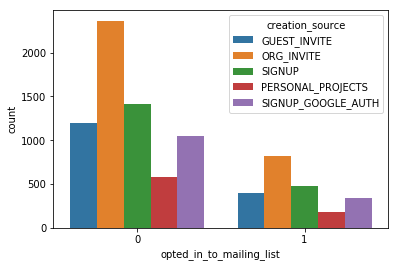

In [802]:
sns.countplot(x='opted_in_to_mailing_list', 
              data = user_details_cleaned , 
              hue='creation_source')
plt.show()

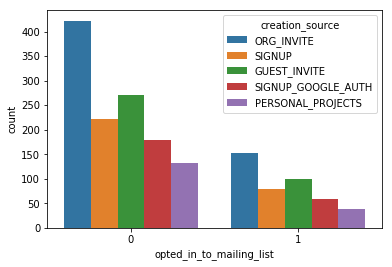

In [800]:
sns.countplot(x='opted_in_to_mailing_list', 
              data = user_details_cleaned[user_details_cleaned.adopted_user==True] , 
              hue='creation_source' )
plt.show()

In [818]:
adop_user_org_cnt = user_details_cleaned[user_details_cleaned.adopted_user == True].groupby(['org_id']).agg(['count'])['email']
all_user_org_cnt = user_details_cleaned.groupby(['org_id']).agg(['count'])['email']

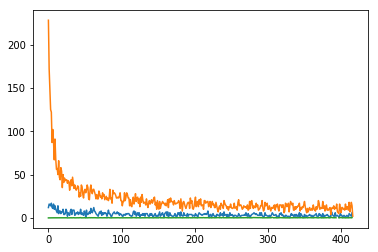

In [820]:
plt.plot(adop_user_org_cnt)
plt.plot(all_user_org_cnt)
plt.show()

In [898]:
x = (adop_user_org_cnt/all_user_org_cnt)
x[x <= 0.2].dropna().count()


count    210
dtype: int64

`Observations`

* There are 401 organizations in the dataset.
* There 2 organizations with more than 60% adoption rate w.r.t total signed up users.
* 12 organization with more than 50% adoption rate w.r.t total signed up users.
* 26 organiations with less than 9% adoption rate w.r.t total signed up users.
* 327 organization with less than 30% adoption rate w.r.t total signed up users.


In [894]:
adopted_user_invited_by = user_details_cleaned[user_details_cleaned.adopted_user == True].groupby(['invited_by_user_id']).agg(['count'])['email']

print("All Adopted users invited by other user %s" %adopted_user_invited_by[adopted_user_invited_by > 1].dropna().sum())

all_users_invited_user = user_details_cleaned[~user_details_cleaned.invited_by_user_id.isna()].groupby(['invited_by_user_id']).agg(['count'])['email']

print("Users invited by other users invitation %s" %all_users_invited_user[all_users_invited_user > 1].dropna().sum())

with_no_invitation = user_details_cleaned[user_details_cleaned.invited_by_user_id.isna()]

print("Users who signedup without invitation %s" %with_no_invitation.count()['email'])

All Adopted users invited by other user count    325.0
dtype: float64
Users invited by other users invitation count    3721.0
dtype: float64
Users who signedup without invitation 4047


`Observations`

* Of all signed users, there are ~45% users are invited by other users.
* Of all invited users, there is 10% of users adopted users.